# Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-11-22 16:57:18.979170: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 16:57:19.005416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 16:57:19.447322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Download and prepare the MNIST dataset
The MNIST is a database of gray-scale handwritten digits images containing 60,000 training images and 10,000 testing images. Each image is of 28x28 pixels.

In [2]:
# use datasets.minst.load_data() to download the data set, and then separately store the labelled training and test data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Data Exploring

Please explore the datasets, e.g., confirming the previous statement on the dataset (shape of the image, number of images), type of labels.

In [ ]:
print("Size and shape of training dataset:", # Code here)
print("number of training samples", # Code here)
print("Print some of the training labels", # Code here)
print("Size and shape of test dataset", # Code here)
print("How is an image represented? Min value, Maximum value? ",# Code here,"-", # Code here)

# Visualize the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

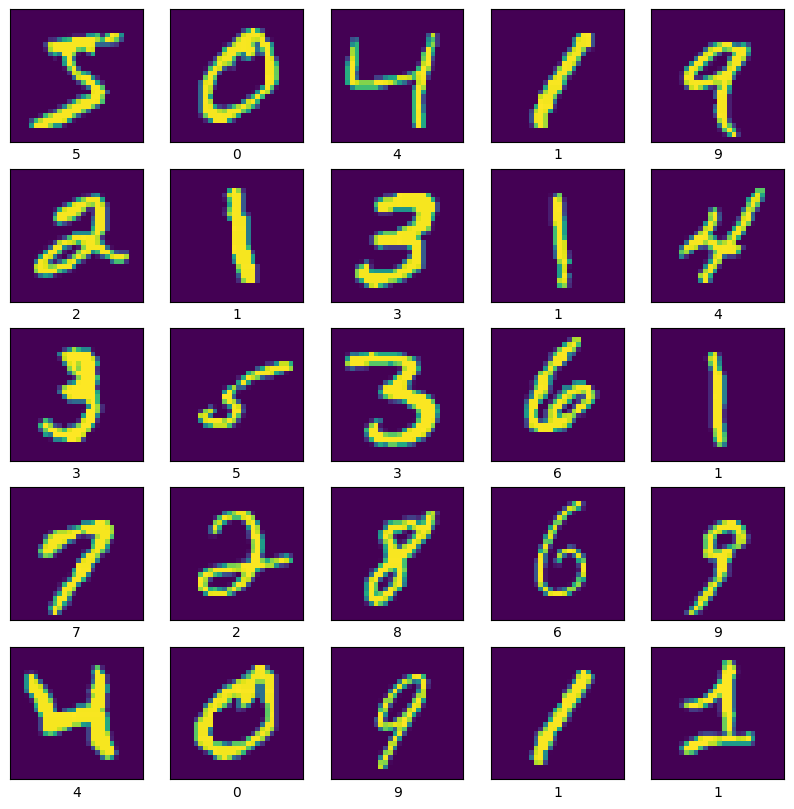

In [3]:
class_names = [i for i in range(10)]

# plot part of the training data for visualization along with their corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Normalize the dataset
Normalizing a dataset in the context of data preprocessing refers to the process of scaling the values of variables to a standard range. The purpose of normalization is to bring all variables to a similar scale, typically between 0 and 1, so that they have comparable influence when used in machine learning algorithms or statistical analyses.

-Normalize the input images so their values are between (0,1)

## Create Model

We will create our image classifier model by stacking fully connected layers or dense layers. Dense layers take vectors as input (which are 1D), while our input images are 2D tensors. First, you need to flatten (or unroll) the 2D image to 1D matrix, then add 2 dense layers on top with relu activation and a final Dense layer with 10 outputs and no activation.

Models in Keras can come in two forms – Sequential and via the Functional API.  For most deep learning networks that you build, the Sequential model is likely what you will use.  It allows you to easily stack sequential layers, and even recurrent layers, of the network in order from input to output. The functional API allows you to build more complicated architectures, and it won't be covered in this exercise.

In [ ]:
model = tf.keras.Sequential()
model.add()
model.add()
model.add()

## Show Model Summary

Print the model architecture using the .summary() method.

## Train the model
This requires two steps:
I) compile the model
II) fit the model.

I) Compiling the model takes three parameters: optimizer, loss and metrics.
The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.
We will use ‘SparseCategoricalCrossentropy(from_logits=True)’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.
To make things easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model (calculates how often predictions equal labels.).

 II) To train, we will use the `history=model.fit()` function on our model with the following parameters: training data (training images), target data (training labels), the number of epochs (you can use 10 here) and the validation data (test images and labels) (with argument `validation_date=`).

## Evaluate Trained Model

Use the `model.evaluate()` method to evaluate the test loss and the test accuracy of the trained model on the test dataset.



##Plot the trained model

Plot the training and validation accuracy and their progression over the epochs. These metrics are recorded in the history class and can be accessed by using the .history variable.

# Part 2: Image Classification using Convolutional Layers
In this part, we will create an image classifier using convolutional layers. Convolutional Neural Networks (CNNs) are typically better than fully connected networks (also known as dense or fully connected layers) for image classification tasks for several reasons; They can extract local features in the image and are more computationally efficient than dense networks.

## Create the convolutional base

The code below defines the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. Where color_channels refers to (R,G,B). In this example, you will configure the CNN to process inputs of shape (28, 28, 1), which is the format of MINST images. You can do this by passing the argument input_shape to the first layer. First, define a sequential base model.


In [ ]:
# declare the model type as Sequential

Add a 2D convolutional layer to process the 2D input images. The first argument passed to the `Conv2D()` layer function is the number of output channels (in this case we have 28 output channels). The next input is the kernel_size, which in this case we have chosen to be (3x3). Next, the activation function is a rectified linear unit (relu) and finally we have to supply the model with the size of the input to the layer. Declaring the input shape is only required of the first layer – Keras works out the size of the tensors flowing through the model from there.

Add a 2D max pooling layer, simply specify the size of the pooling in the x and y directions – (2, 2) in this case.

Next, add another convolutional +2D  max pooling layer, with 64 output channels.  The default strides argument in the Conv2D() function is (1, 1) in Keras, so we can leave it out.

Display the architecture of the model so far.

The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

# Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (5, 5, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one dense layers on top with relu activation and a final Dense layer with 10 outputs and no activation.

In [ ]:
# Flatten the output to a vector

# Add an output layer, where the size is the number of the classes of images


# Train the model
This requires two steps: I) compile the model II) fit the model.

# Plot and Evaluate the trained model


# Part 3: Image Classification using Convolutional Layers on the CIFAR10 dataset

# Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
# use datasets.cifar10.load_data() to download the data set, and then separately store the labelled training and test data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


# Visualize the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# plot part of the training data for visualization along with their corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Build the model, compile it, and train it